⚠️ Arquivo não encontrado: ./createDid_resource_metrics_by_tps/createDid_resource_metrics_tps_140.csv
⚠️ Arquivo não encontrado: ./createDid_resource_metrics_by_tps/createDid_resource_metrics_tps_160.csv
⚠️ Arquivo não encontrado: ./createDid_resource_metrics_by_tps/createDid_resource_metrics_tps_180.csv
⚠️ Arquivo não encontrado: ./createDid_resource_metrics_by_tps/createDid_resource_metrics_tps_200.csv


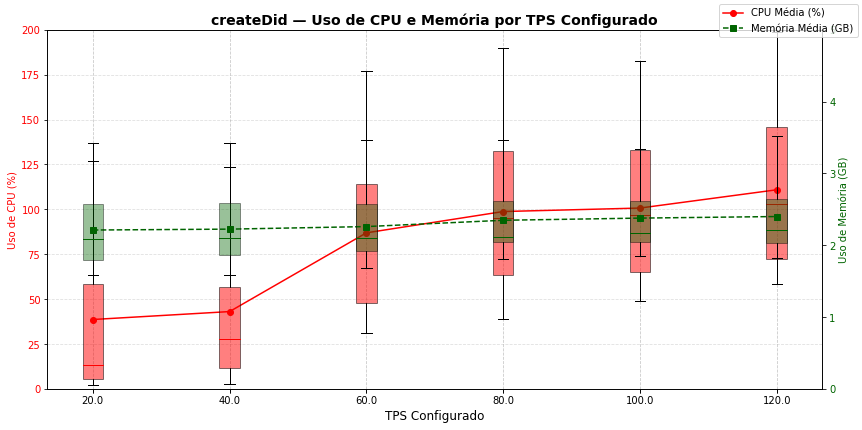

✅ Gráfico salvo: createDid_cpu_memoria_tps.png
⚠️ Arquivo não encontrado: ./updateDid_resource_metrics_by_tps/updateDid_resource_metrics_tps_140.csv
⚠️ Arquivo não encontrado: ./updateDid_resource_metrics_by_tps/updateDid_resource_metrics_tps_160.csv
⚠️ Arquivo não encontrado: ./updateDid_resource_metrics_by_tps/updateDid_resource_metrics_tps_180.csv
⚠️ Arquivo não encontrado: ./updateDid_resource_metrics_by_tps/updateDid_resource_metrics_tps_200.csv


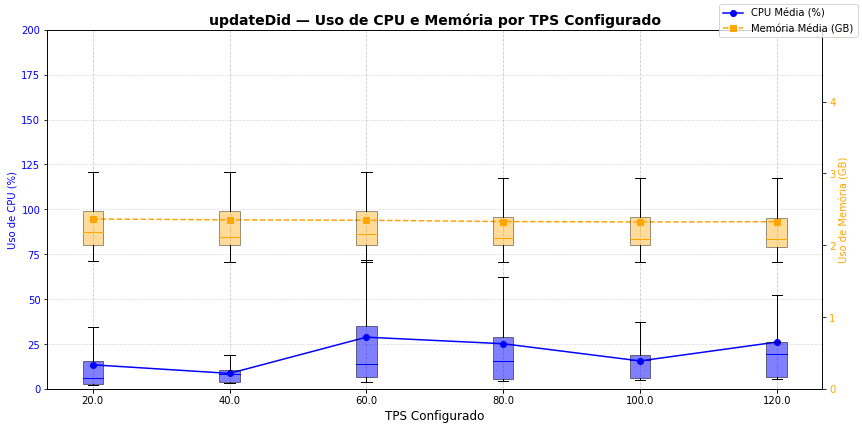

✅ Gráfico salvo: updateDid_cpu_memoria_tps.png
⚠️ Arquivo não encontrado: ./createSchema_resource_metrics_by_tps/createSchema_resource_metrics_tps_140.csv
⚠️ Arquivo não encontrado: ./createSchema_resource_metrics_by_tps/createSchema_resource_metrics_tps_160.csv
⚠️ Arquivo não encontrado: ./createSchema_resource_metrics_by_tps/createSchema_resource_metrics_tps_180.csv
⚠️ Arquivo não encontrado: ./createSchema_resource_metrics_by_tps/createSchema_resource_metrics_tps_200.csv


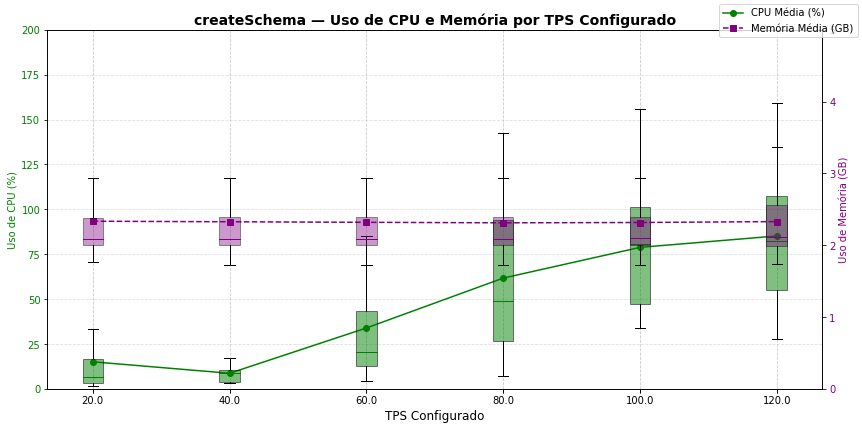

✅ Gráfico salvo: createSchema_cpu_memoria_tps.png
⚠️ Arquivo não encontrado: ./createCredentialDefinition_resource_metrics_by_tps/createCredentialDefinition_resource_metrics_tps_140.csv
⚠️ Arquivo não encontrado: ./createCredentialDefinition_resource_metrics_by_tps/createCredentialDefinition_resource_metrics_tps_160.csv
⚠️ Arquivo não encontrado: ./createCredentialDefinition_resource_metrics_by_tps/createCredentialDefinition_resource_metrics_tps_180.csv
⚠️ Arquivo não encontrado: ./createCredentialDefinition_resource_metrics_by_tps/createCredentialDefinition_resource_metrics_tps_200.csv


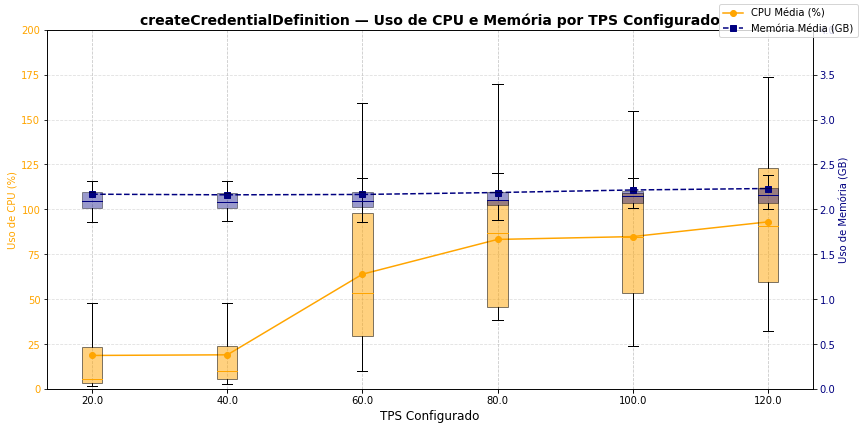

✅ Gráfico salvo: createCredentialDefinition_cpu_memoria_tps.png
⚠️ Arquivo não encontrado: ./createOrUpdateEntry_resource_metrics_by_tps/createOrUpdateEntry_resource_metrics_tps_140.csv
⚠️ Arquivo não encontrado: ./createOrUpdateEntry_resource_metrics_by_tps/createOrUpdateEntry_resource_metrics_tps_160.csv
⚠️ Arquivo não encontrado: ./createOrUpdateEntry_resource_metrics_by_tps/createOrUpdateEntry_resource_metrics_tps_180.csv
⚠️ Arquivo não encontrado: ./createOrUpdateEntry_resource_metrics_by_tps/createOrUpdateEntry_resource_metrics_tps_200.csv


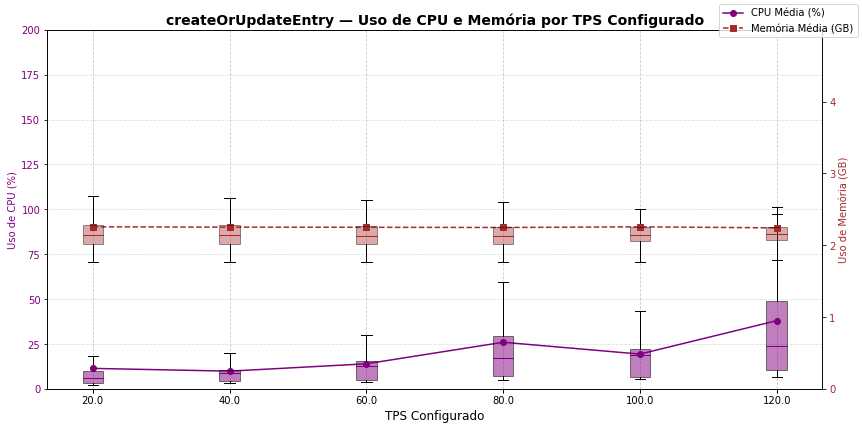

✅ Gráfico salvo: createOrUpdateEntry_cpu_memoria_tps.png
⚠️ Arquivo não encontrado: ./createRevocationRegistry_resource_metrics_by_tps/createRevocationRegistry_resource_metrics_tps_140.csv
⚠️ Arquivo não encontrado: ./createRevocationRegistry_resource_metrics_by_tps/createRevocationRegistry_resource_metrics_tps_160.csv
⚠️ Arquivo não encontrado: ./createRevocationRegistry_resource_metrics_by_tps/createRevocationRegistry_resource_metrics_tps_180.csv
⚠️ Arquivo não encontrado: ./createRevocationRegistry_resource_metrics_by_tps/createRevocationRegistry_resource_metrics_tps_200.csv


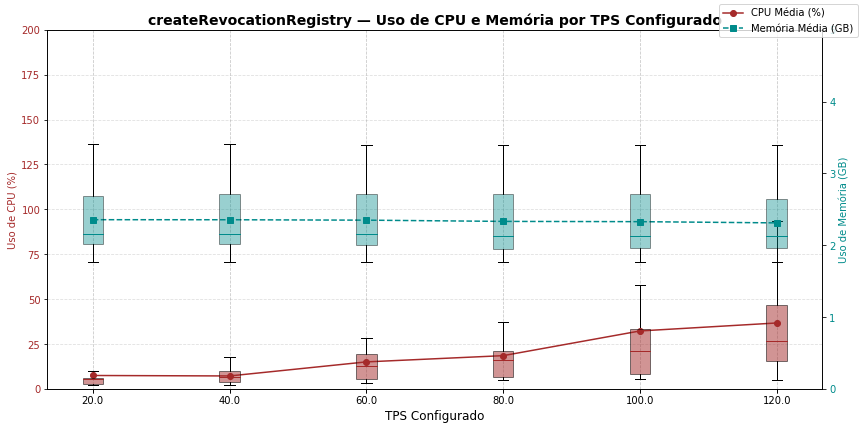

✅ Gráfico salvo: createRevocationRegistry_cpu_memoria_tps.png


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# =================== CONFIGURÁVEL ===================
functions_to_compare = [
    {"script_name": "createDid", "color_cpu": "red", "color_mem": "darkgreen"},
    {"script_name": "updateDid", "color_cpu": "blue", "color_mem": "orange"},
    {"script_name": "createSchema", "color_cpu": "green", "color_mem": "purple"},
    {"script_name": "createCredentialDefinition", "color_cpu": "orange", "color_mem": "navy"},
    {"script_name": "createOrUpdateEntry", "color_cpu": "purple", "color_mem": "brown"},
    {"script_name": "createRevocationRegistry", "color_cpu": "brown", "color_mem": "darkcyan"},
]
tps_values = [20, 40, 60, 80, 100, 120]
# ====================================================

for func in functions_to_compare:
    script = func["script_name"]
    resource_folder = f"./{script}_resource_metrics_by_tps"
    cpu_data, mem_data = [], []

    for tps in tps_values:
        file_path = os.path.join(resource_folder, f"{script}_resource_metrics_tps_{tps}.csv")
        if not os.path.exists(file_path):
            print(f"⚠️ Arquivo não encontrado: {file_path}")
            continue

        df = pd.read_csv(file_path)
        cpu_vals = df[["CPU%(avg)", "CPU%(max)"]] * 100
        cpu_data.append(cpu_vals.values.flatten())

        mem_vals = df[["Memory(avg) [GB]", "Memory(max) [GB]"]]
        mem_data.append(mem_vals.values.flatten())

    if not cpu_data or not mem_data:
        print(f"⚠️ Dados insuficientes para gerar gráfico para: {script}")
        continue

    cpu_mean_trend = [np.mean(data) for data in cpu_data]
    mem_mean_trend = [np.mean(data) for data in mem_data]
    positions = np.array(tps_values[:len(cpu_data)], dtype=float)
    width = 0

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # CPU
    ax1.boxplot(cpu_data, positions=positions - width, widths=3,
                patch_artist=True, boxprops=dict(facecolor=func["color_cpu"], alpha=0.5),
                medianprops=dict(color=func["color_cpu"]), showfliers=False)
    ax1.plot(positions - width, cpu_mean_trend, linestyle='-', color=func["color_cpu"],
             marker='o', label='CPU Média (%)')

    ax1.set_ylim(0, 200)
    ax1.set_ylabel('Uso de CPU (%)', color=func["color_cpu"])
    ax1.tick_params(axis='y', labelcolor=func["color_cpu"])
    ax1.set_xlabel('TPS Configurado', fontsize=12)
    ax1.set_xticks(positions)
    ax1.set_xticklabels(tps_values[:len(cpu_data)], fontsize=10)

    # Memória
    ax2 = ax1.twinx()
    ax2.boxplot(mem_data, positions=positions + width, widths=3,
                patch_artist=True, boxprops=dict(facecolor=func["color_mem"], alpha=0.4),
                medianprops=dict(color=func["color_mem"]), showfliers=False)
    ax2.plot(positions + width, mem_mean_trend, linestyle='--', color=func["color_mem"],
             marker='s', label='Memória Média (GB)')

    mem_max_val = max([max(data) for data in mem_data])
    mem_ymax = np.ceil(mem_max_val + 0.5)
    ax2.set_ylim(0, mem_ymax)
    ax2.set_ylabel('Uso de Memória (GB)', color=func["color_mem"])
    ax2.tick_params(axis='y', labelcolor=func["color_mem"])

    # Legenda combinada
    handles1, labels1 = ax1.get_legend_handles_labels()
    handles2, labels2 = ax2.get_legend_handles_labels()
    fig.legend(handles1 + handles2, labels1 + labels2, loc='upper right', frameon=True)

    plt.title(f'{script} — Uso de CPU e Memória por TPS Configurado', fontsize=14, weight='bold')
    ax1.grid(True, linestyle='--', alpha=0.4)
    plt.tight_layout()
    output_path = f"{script}_cpu_memoria_tps.png"
    plt.savefig(output_path, dpi=300)
    plt.show()
    print(f"✅ Gráfico salvo: {output_path}")
